# Decision Tree Regression

## Importing the libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

## Importing the dataset

In [76]:
dataset = pd.read_csv('Position_Salaries.csv')
# dataset = dataset.assign(ExperienceYrs = [2, 3, 5, 7, 5, 8, 6, 12, 15, 17])
# dataset
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, 2]

Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10

## Training the Decision Tree Regression model on the whole dataset

In [105]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
poly_X = pd.DataFrame(poly.fit_transform(X))
# regressor = DecisionTreeRegressor(random_state = 0, criterion='squared_error')
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size= 0.2, train_size= 0.8, random_state= 0)
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting a new result

In [106]:
y_test

2     60000
8    500000
Name: Salary, dtype: int64

In [107]:
r2(y_test, regressor.predict(X_test))
# mse(y_test, regressor.predict(X_test))

0.9692575841570868

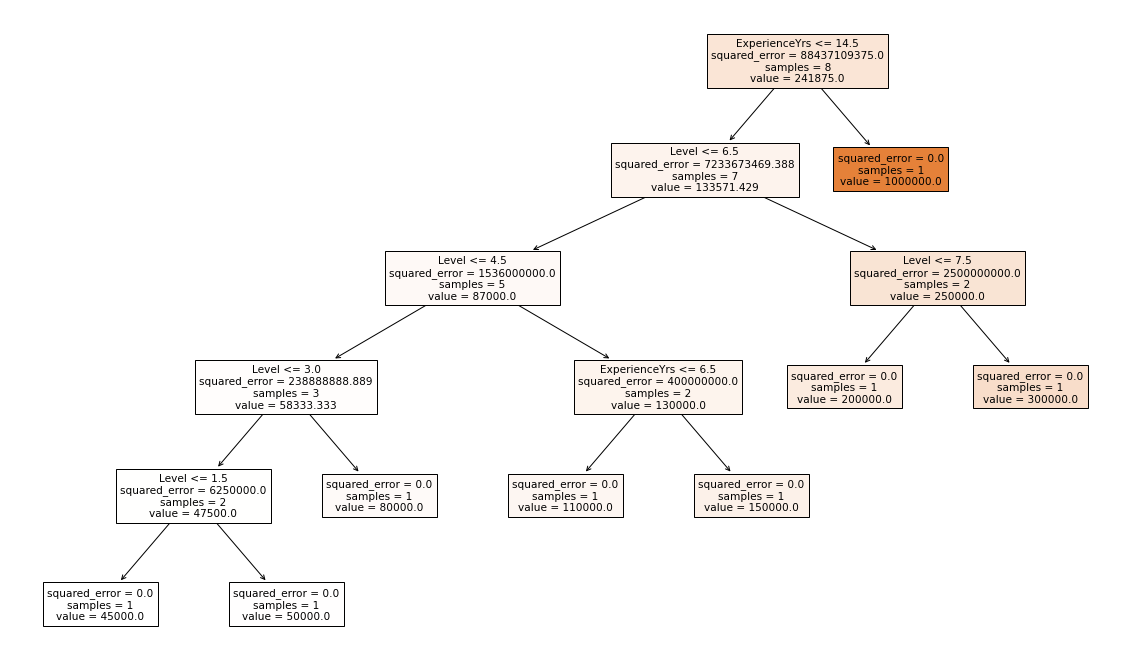

In [72]:
plt.figure(figsize = (20, 12))

_ = tree.plot_tree(regressor, feature_names = X_train.columns, class_names= ['Salary'], filled = True, )
plt.show()

In [68]:
regressor.predict(X_test)

array([  50000., 1000000.])

In [70]:
from sklearn.metrics import r2_score

r2_score(y_test, regressor.predict(X_test))

-1.5836776859504131

## Visualising the Decision Tree Regression results (higher resolution)

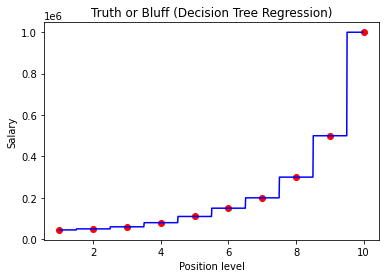

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()